<div align="center"><h1>Control Engineering Basics</h1>
<br><b>Dr.Varodom Toochinda</b>
<br>Dept. of Mechanical Engineering, Kasetsart University</div>

<a href="https://colab.research.google.com/github/dewdotninja/control_python/blob/master/ceb_m6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 6: Discrete-time Control Systems

<b>Requirement : </b> Python 3 with Python control systems library
<p />Execute the commands below to install Python control systems library in Colab    


In [ ]:
!pip install slycot

In [ ]:
!pip install control

This article is contained in Control Engineering Basics study module, which is used as course 
material for Electrical-Mechanical Manufacturing Engineering (EMME), Department of Mechanical 
Engineering, Kasetsart University.

### Module Key Study Points
* Learn the basics of a digital control system
* Understand sampling process and aliasing problem
* Learn how to convert from continuous-time to discrete-time system

In [1]:
import control as ctl # note the slight change from previous modules
import numpy as np
import matplotlib.pyplot as plt

<p />As we all know, most controllers nowadays are implemented digitally. So the 
continuous-time feedback diagram in needs to be changed to a hybrid form in Figure 1. 
Now we have two domains separated by the vertical dotted line; i.e., the controller side 
is discrete, and the plant side is continuous. To connect them together, we need additional 
components to convert the signals from one form to another. The block labeled DAC 
(Digital-to-Analog Converter) and  ADC (Analog-to-Digital Converter) are commonly-used to 
serve this purpose. Most modern microcontrollers have built-in ADC units, but those with 
internal DAC’s are rare. Nevertheless, it is not difficult to find an external DAC chip 
with easy interface.
<p align="center">
<img src="https://drive.google.com/uc?id=1ly05Kt9QissKKqwvQhGShsCJNIGl-tUF" width=600 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 A digital control system</b></div>
<p />Note that Figure 1 shows a basic configuration. Some systems may differ slightly. For 
instance, motion control applications usually get feedback from motor encoders, which are 
digital in nature. In such case the ADC is not required. For some motor amplifier that 
receives a PWM (Pulse-Width-Modulation) input, the PWM unit then replaces the DAC. 
Nevertheless, the essence remains. The controller is digital. It is described either by 
difference equations, or by a Z- transfer function.  Before we get into that, an important 
issue must be addressed. 
<h3>Sampling Analog Signal</h3>
<p />While a real world signal is continuous, a computer works with values stored in a bank of 
memory. At one moment in time, a value to be processed is addressed by a data pointer. So, 
as shown in Figure 2, the continuous signal $x(t)$ has to be sampled into a sequence $x[k]$,
where integer $k$ is the index, or the relative address of data to be selected by the pointer.
The signal $x(t)$ is sampled at fixed time interval $\Delta$, called the sampling period. 
(In some areas of engineering such as communication systems, multi-rate sampling may exist, 
 but for digital control applications there is no use for such complicated schemes.) 
<p align="center">
<img src="https://drive.google.com/uc?id=1k65YxRH-ERHCuIp76KpNuo3ZDVLP2iMI" width=600 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 Sampling a continuous signal</b></div>
<p />A question follows naturally. How often should we sample the signal $x(t)$? Common sense 
tells us the more frequent, the better, since it is obvious from Figure 6 if the samples 
$x[k]$ are close together, they should represent $x(t)$ very well. That is valid. But, well, 
we tend to forget one thing. The more frequent the sampling, the more data we have to keep. 
In a modern desktop PC this does not sound like a problem. But for embedded control 
applications, resources are expensive. The memory allocated for data process may be limited. 
<p />Let us investigate what happens if the sampling rate is too low. Figure 3 shows such 
a scenario. The original signal we want to sample is $x(t)$. Undersampling causes the 
reconstructed signal $x'(t)$ much different from the original. This problem is called aliasing. Another good example of aliasing is when we watch a movie, sometimes we notice a moving car with its wheels turn in the opposite direction. The film is an image sampling system. That happens when the frame rate is too slow relative to the angular velocity of the wheel. 
<p align="center">
<img src="https://drive.google.com/uc?id=15DTDOJrJTTUsgyy4NjJiCTUcgYWg6DRq" width=600 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 Aliasing problem</b></div>

<p />So, how could we select a proper sampling frequency? Intuitively, we can guess from 
Figure 3 that if we sample at least twice the frequency of the red sine wave, things should 
work fine. That is in fact an established result, known as the Nyquist-Shannon Sampling 
Theorem. One could find the details elsewhere. Here we state only the essence, in plain 
English: the sampling rate must be at least twice the system bandwidth.  
<p />This sampling theorem only gives us a lower bound. Practically we would want a higher 
sampling rate, say, 10 times the system bandwidth. Of course, tradeoffs between sampling 
rate and amount of data memory need to be considered. Also, if a controller is working in 
real-time, it has to fetch a data point, do some processing, and output something. We have 
to make sure the whole algorithm could finish within the sampling time interval. 
<p />Figure 4 shows a basic structure for a real-time  control algorithm. Notice that it 
has to be implemented as a timer interrupt service routine to achieve a fixed, precise 
sampling period. 
<p align="center">
<img src="https://drive.google.com/uc?id=17-f_rptK6qhuIFIcQ-M40szDjGpB0ox9" width=250 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 4 A real-time control algorithm</b></div>
<h3>Discrete System Representation</h3>
<p />A continuous-time dynamical system can be represented in the time domain by a 
differential equation. We can use Laplace transform to find a representation in the 
frequency domain, called a transfer function. Similar mechanisms exist for discrete-time. 
A discrete-time dynamical system can be represented in time domain by a difference equation. 
The math tool to convert it to a transfer function is called Z-transform. 
<P />Figure 5 shows 3 basic elements of a discrete system: summer, multiplier, and delay. 
The first two operators behave the same as in continuous time. The third one is unique 
to discrete world, but nothing is complicated about it. Output from the D block is 
simply the input delayed by one sample. In Figure 5, let’s say the input to D is $e[2]$, 
then the output of D equals $e[1]$. When we convert the system using Z-tranform, 
what comes out is a rational function of a complex variable $z$. Without going into 
the theory, the point to remember is the unit delay D transforms to $z^-1$ in the 
Z-domain.
<p align="center">
<img src="https://drive.google.com/uc?id=11CbB1V6NY1JUDree0FLIpjabcDn_CkVq" width=600 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 5 Discrete system representation in time and frequency domain</b></div>
<p />As often the case, the control design is done in continuous-time domain. After the 
design process finishes, the S-domain transfer function (or continuous-time state space 
description) is converted to a discrete transfer function in Z-domain. Of course, you can 
discretize the continuous-time plant model as well, which may be particularly useful in 
case you want to simulate the plant in an embedded processor.

<b>Example 1: </b>From previous modules we work with the plant transfer function for 
robot joint driven by DC motor
\begin{equation} 
P(s) = \frac{1}{10s^2 + 0.1s}
\end{equation}
<div align="right">(1)</div>
<p />and the lead-lag controller 
\begin{equation} 
C(s) = 20000\frac{(s+0.01)}{(s+100)}  
\end{equation}
<div align="right">(2)</div>
<p />Construct these transfer functions

In [2]:
# robot-joint plant
pnum = 1
pden = [10, 0.1, 0]
P = ctl.tf(pnum,pden)
P

TransferFunction(array([1]), array([10. ,  0.1,  0. ]))

In [11]:
# controller
cnum = [1, 0.01]
cden = [1, 100] 
C = 20000*ctl.tf(cnum,cden)
C

TransferFunction(array([20000.,   200.]), array([  1, 100]))

and convert to discrete-time using <em>sample_system()</em> function, with sampling period 
$T_s = 0.01$ sec and <em>tustin</em> method. 

In [6]:
Ts = 0.01
Pd = ctl.sample_system(P, Ts, method='tustin')
Pd

TransferFunction(array([2.49987501e-06, 4.99975001e-06, 2.49987501e-06]), array([ 1.    , -1.9999,  0.9999]), 0.01)

In [12]:
Cd = ctl.sample_system(C, Ts, method='tustin')
Cd

TransferFunction(array([ 13334.        , -13332.66666667]), array([ 1.        , -0.33333333]), 0.01)

<h3>Closed-loop Stability</h3>
<p />It is explained in a standard textbook in digital control systems that, generally 
speaking,  the stability region of a discrete transfer function is inside a unit circle. 
So we can use this fact to determine whether closed-loop transfer function in Z-domain is 
stable or not. From the above plant and controller data already in Scilab workspace, we form 
the discrete-time complementary sensitivity transfer function

In [13]:
Ld = Cd*Pd
#Td = Ld/(1+Ld)
Td = ctl.feedback(Ld)
Td

TransferFunction(array([ 0.03333333,  0.03333667, -0.03332667, -0.03333   ]), array([ 1.03333333, -2.29989667,  1.63320667, -0.36663   ]), 0.01)

We can then check pole-zero mapping

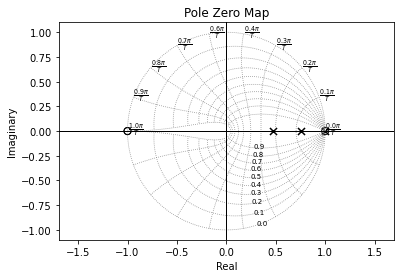

In [15]:
poles,zeros = ctl.pzmap(Td,grid=True)

<p />All the poles are inside the unit circle. we conclude that the closed-loop system 
is stable, as can be verified from the time domain simulation. Indeed, we can compare the 
response with its continuous-time counterpart to see they are almost identical.
<p /><b>Exercise :  </b>Increase sampling period $T_s$ and run comparison again.

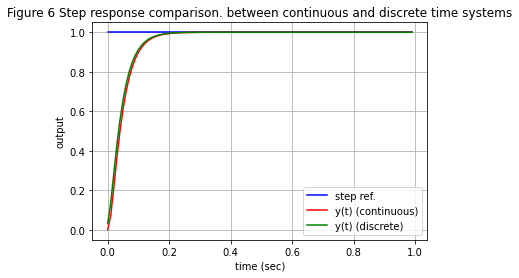

In [17]:
tvec = np.arange(0,1,0.01) 
r = np.ones(tvec.shape)

# form continouous time closed-loop system 
L = C*P
Tc = ctl.feedback(L)

T, yc = ctl.step_response(Tc, tvec)
T, yd = ctl.step_response(Td, tvec)

plt.figure()
plt.plot(T,r,'b',T,yc,'r-',T,yd,'g-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.title("Figure 6 Step response comparison. between continuous and discrete time systems")
plt.legend(['step ref.','y(t) (continuous)','y(t) (discrete)'])
plt.show()


In contrast, we have shown in Module 2 that using the errornous controller
\begin{equation} 
C(s) = 20000\frac{(s+100)}{(s+0.01)}  
\end{equation}
<div align="right">(3)</div>
results in closed-loop instability. This can be verified in the discrete-time domain as follows.


In [4]:
Ts = 0.01
# bad controller
cbnum = [1, 100]
cbden = [1, 0.01] 
Cb = 20000*ctl.tf(cbnum,cbden)
Cbd = ctl.sample_system(Cb, Ts, method='tustin')
Cbd

TransferFunction(array([29998.500075, -9999.500025]), array([ 1.    , -0.9999]), 0.01)

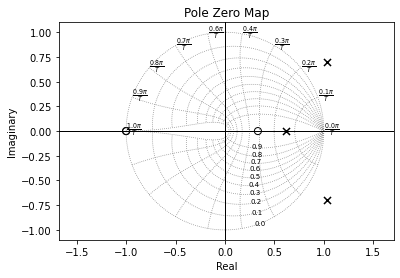

In [16]:
Lbd = Cbd*Pd
Tbd = ctl.feedback(Lbd)
poles, zeros = ctl.pzmap(Tbd, grid=True)

Since some poles are outside the unit circle, we conclude that the discrete-time closed loop system is unstable, 
conforming to the simulation result in Module 2.

<div align="right">Last update : Jan 30, 2021</div>

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>